In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv('diabetes.csv')


In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

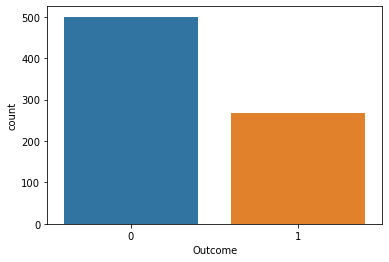

In [10]:
sns.countplot(x = 'Outcome',data = dataset)

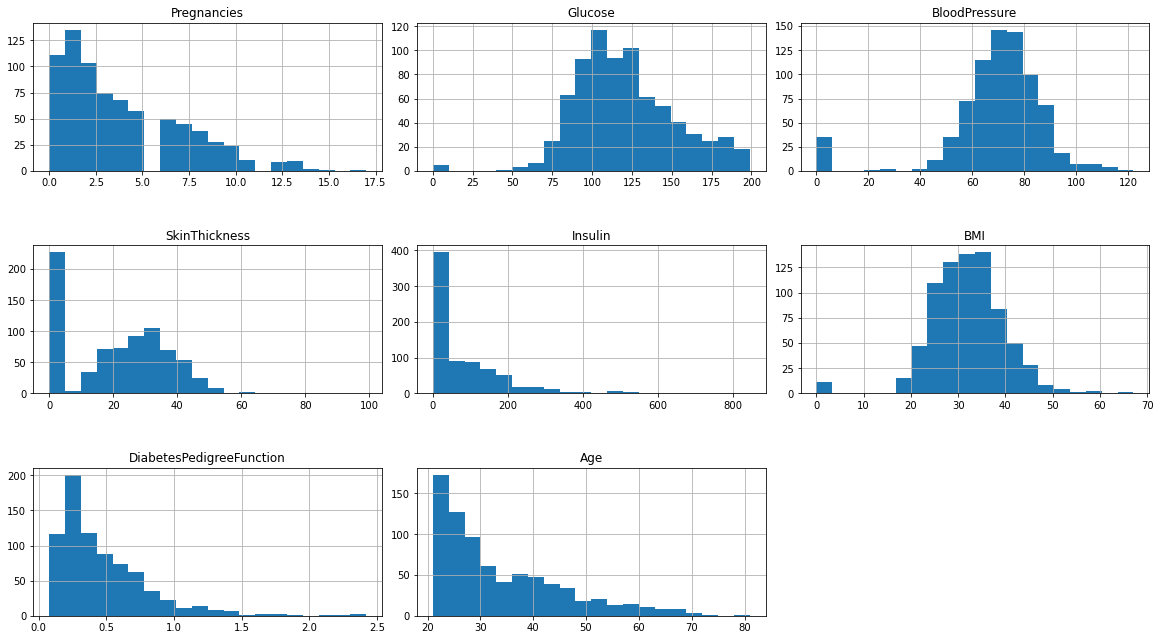

In [11]:
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

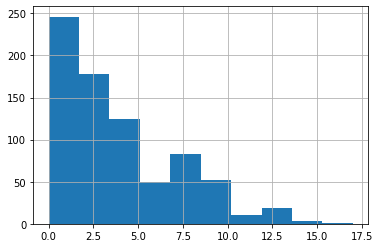

In [12]:
dataset['Pregnancies'].hist(bins=10)
plt.show()

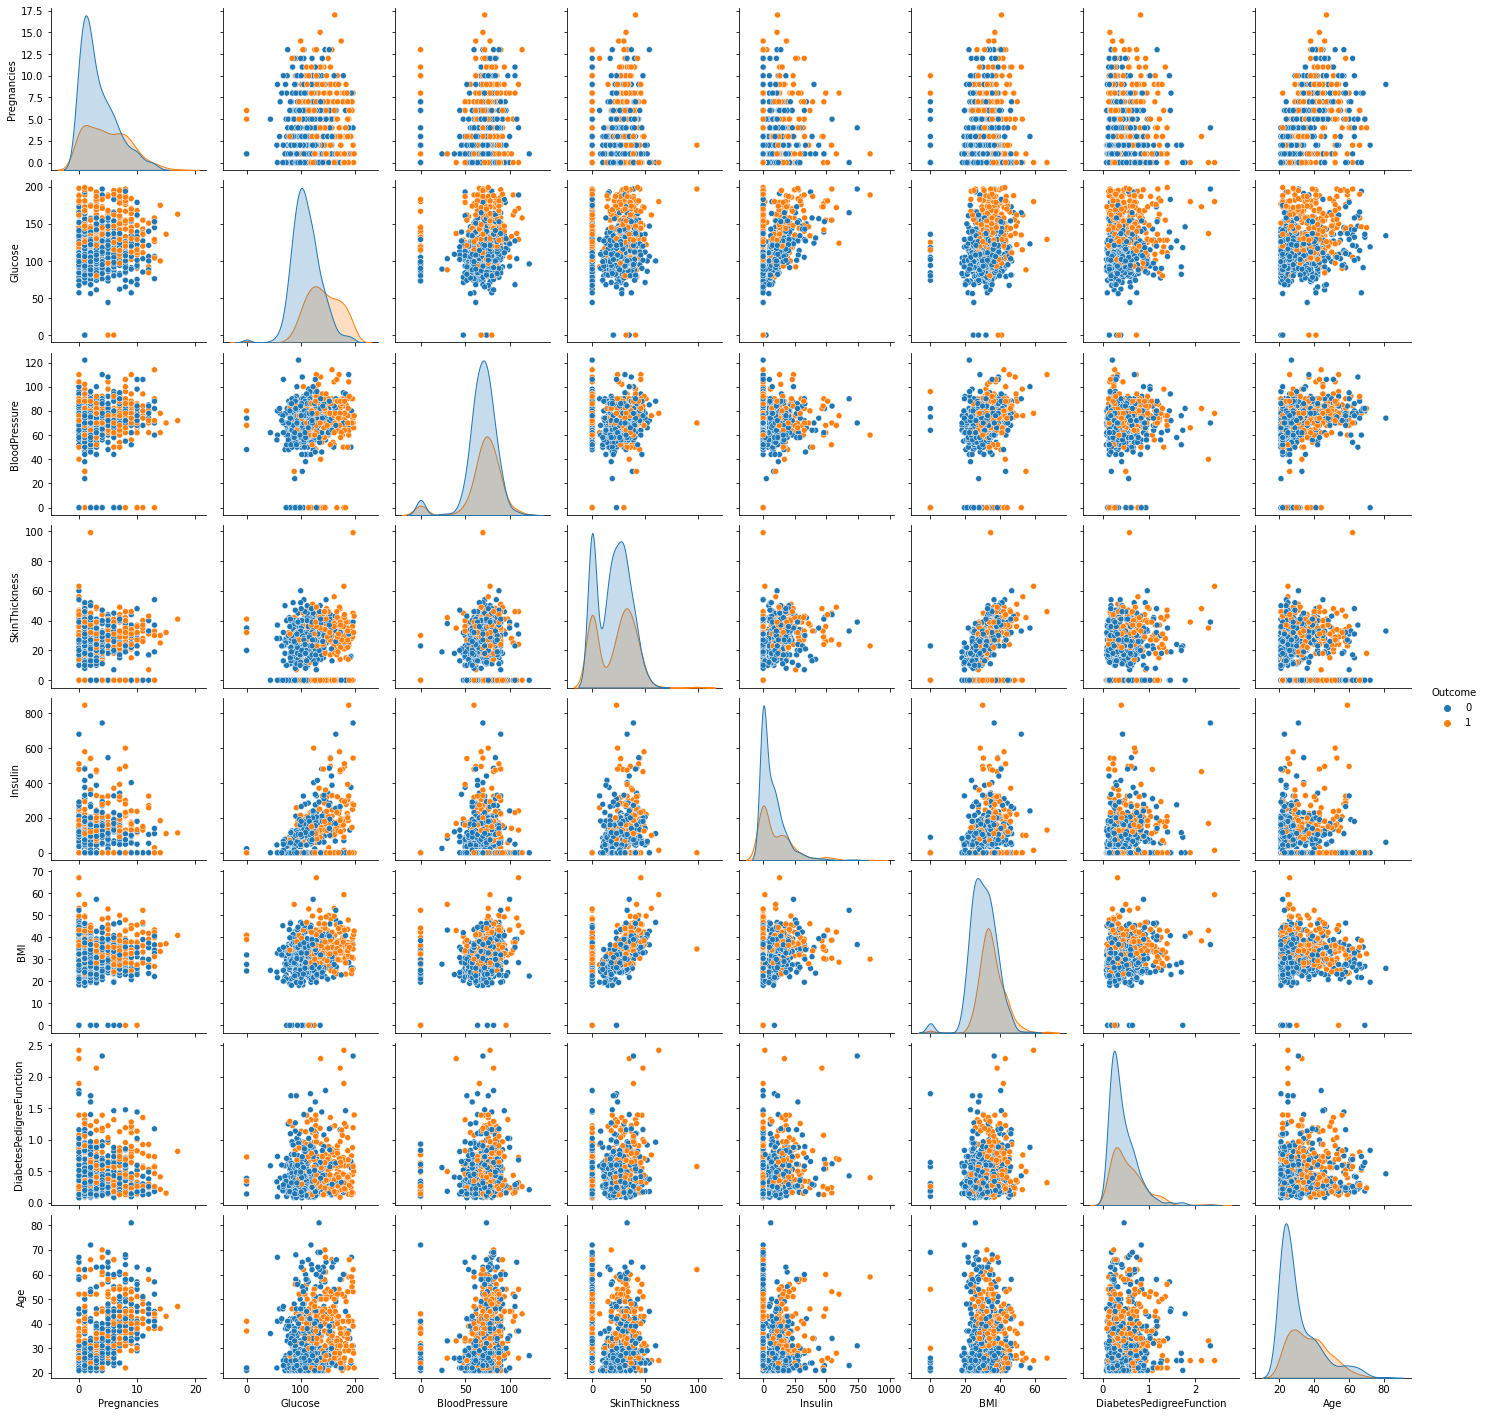

In [13]:
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

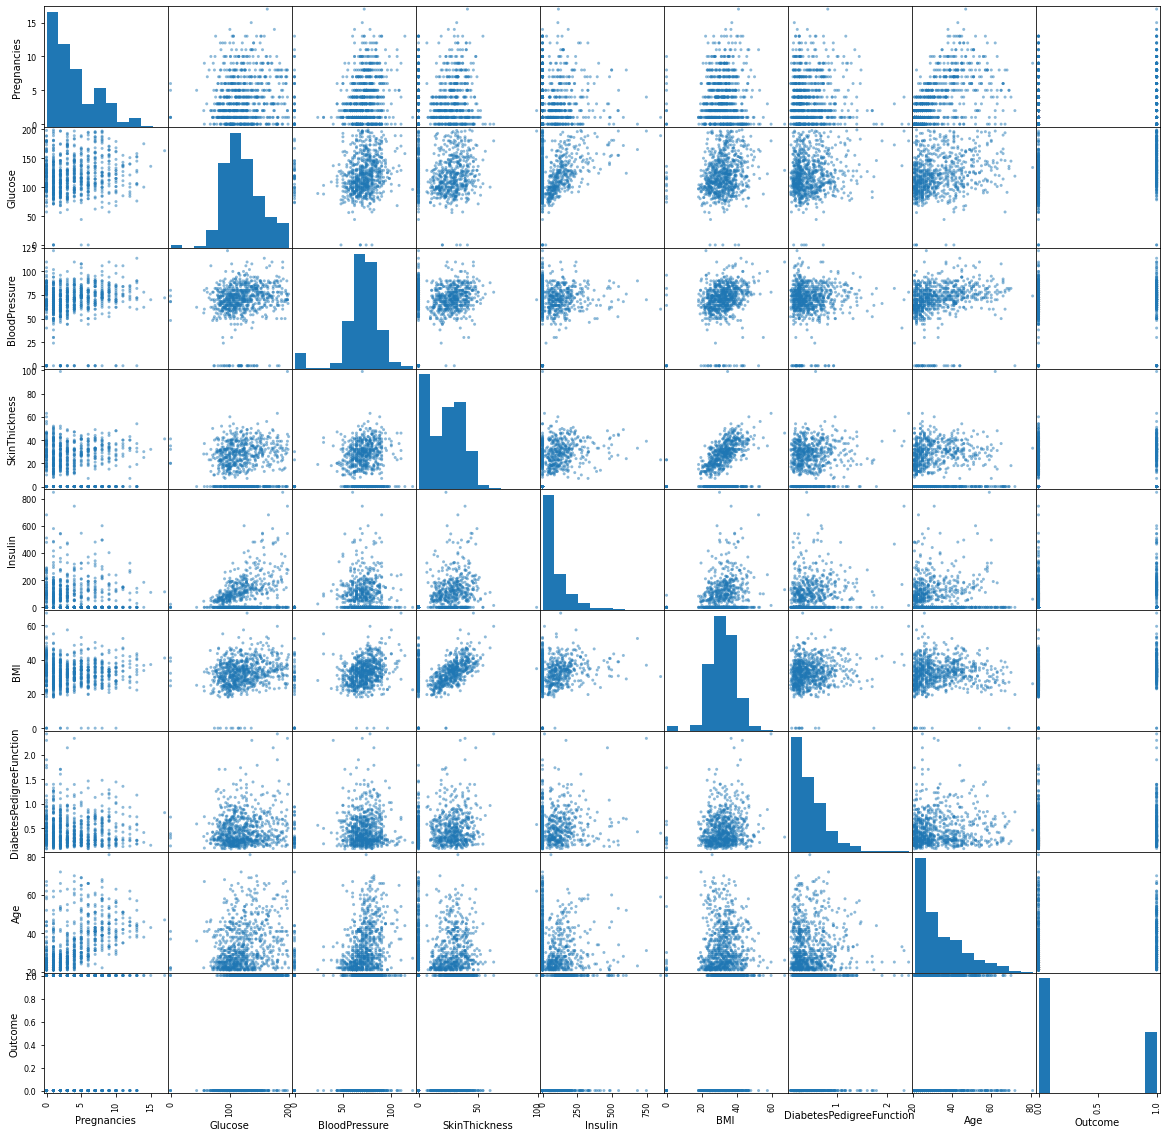

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

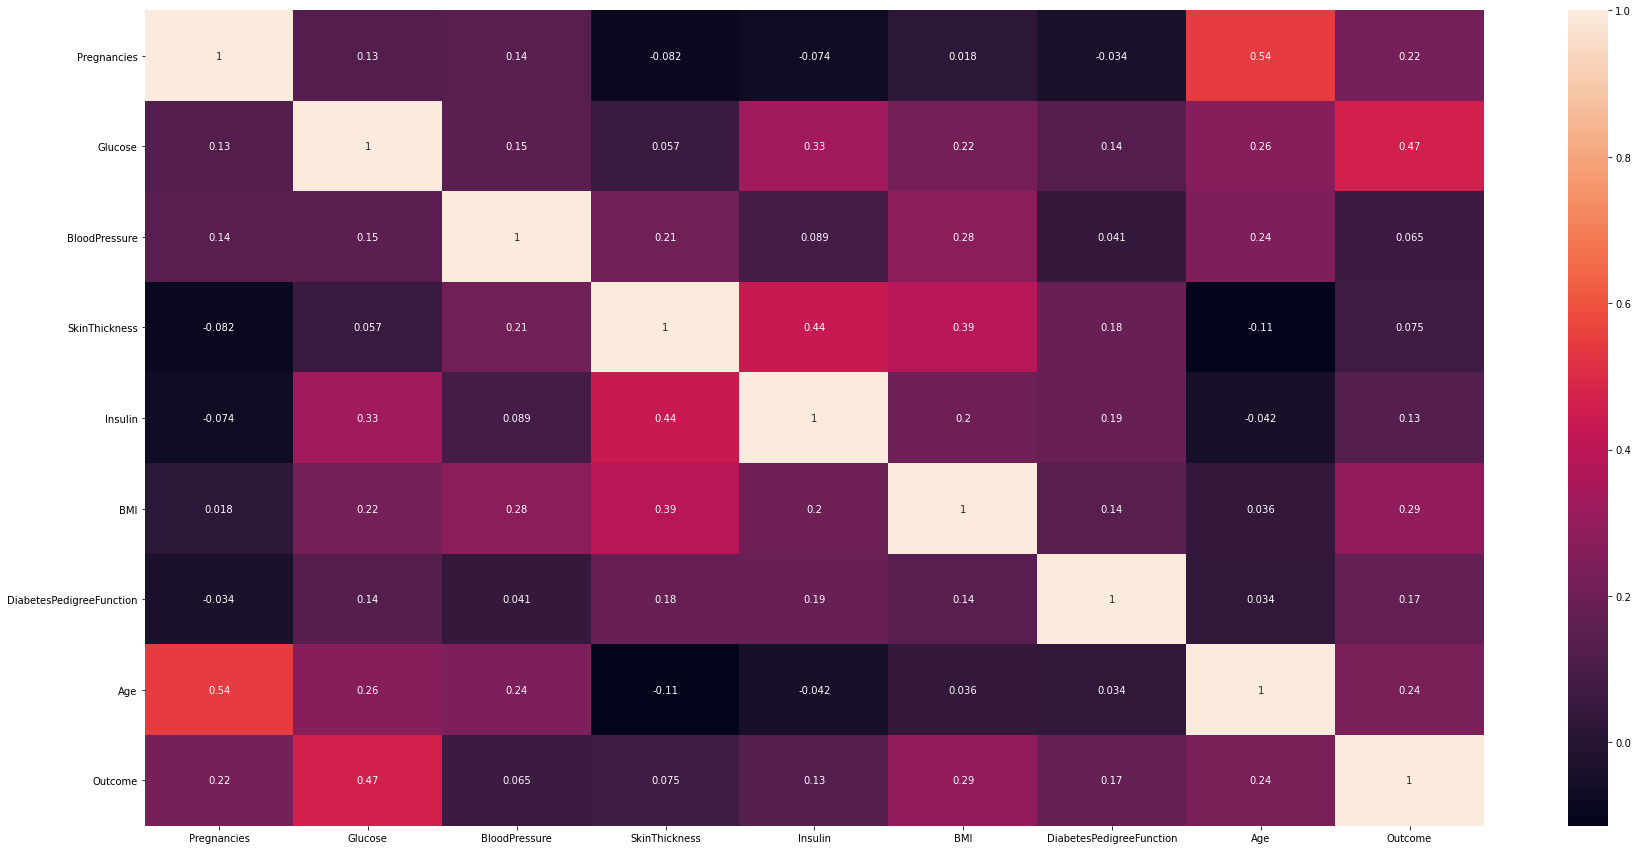

In [3]:

corr = dataset.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot = True)
plt.show()

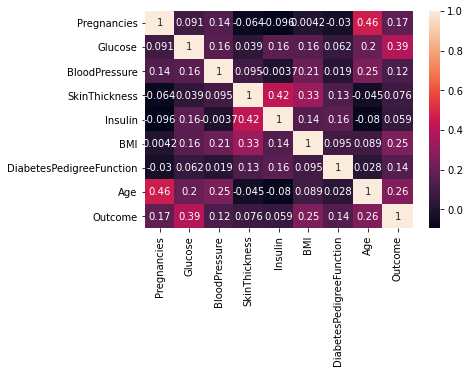

In [4]:
from scipy.stats.stats import kendalltau
corr = dataset.corr(method='kendall')

sns.heatmap(corr, annot = True)
plt.show()

In [5]:
dataset_new = dataset

In [6]:
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",]].replace(0, np.NaN) 

In [15]:
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [8]:
dataset_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [10]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [11]:
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values


Splitting of Data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


Logistic Regression Algorithm

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

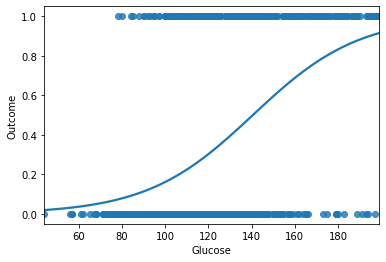

In [15]:
sns.regplot(x=dataset_new['Glucose'], y=dataset_new['Outcome'], data=dataset_new, logistic=True, ci=None)

In [16]:
y_pred=logreg.predict(X_test)
print(y_pred)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]


In [17]:
print(Y_test)

[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.]


In [18]:
tn,tp,fp,fn=0,0,0,0
for i in range(len(Y_test)):
    i=int(i)
    if Y_test[i]==0 and y_pred[i]==0:
        tn+=1
    elif Y_test[i]==1 and y_pred[i]==1:
        tp+=1
    elif Y_test[i]==0 and y_pred[i]==1:
        fp+=1
    else:
        fn+=1
print("TN = "+str(tn))
print("TP = ",str(tp))
print("FP = "+str(fp))
print("FN = "+str(fn))


TN = 84
TP =  27
FP = 16
FN = 27


[[84 27]
 [16 27]]


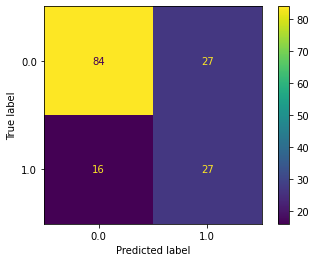

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cnf_matrix=confusion_matrix(y_pred,Y_test,labels=logreg.classes_)
print(cnf_matrix)
display=ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=logreg.classes_)
display.plot()
plt.show()


In [20]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_score = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print("Precision = "+str(precision))
print("Recall = "+str(recall))
print("F_Score = "+str(f_score))
print("Accuracy = "+str(accuracy))

Precision = 0.627906976744186
Recall = 0.5
F_Score = 0.5567010309278351
Accuracy = 0.7207792207792207


In [21]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score
logreg_accuracy = accuracy_score(y_pred, Y_test)
logreg_accuracy

0.7207792207792207

In [22]:
beta_values = np.squeeze(logreg.coef_)
print(beta_values)

[4.45552592 0.6188735  3.13895463 1.37519173]


In [23]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       100
         1.0       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



K Nearest Neighbors Algorithm

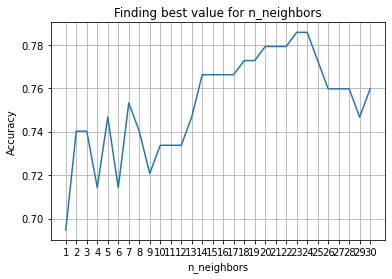

In [24]:
#graph for choosing value of k
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


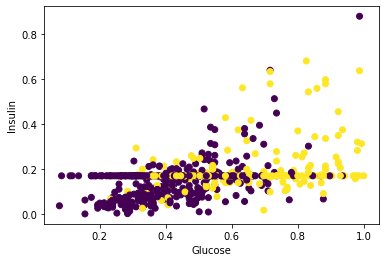

In [25]:
glucose=X_train[:,0]
insulin = X_train[:,1]
classes = Y_train
plt.scatter(glucose, insulin, c=classes)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()


In [26]:
glucose=list(glucose)
insulin = list(insulin)
classes=list(classes)
data = list(zip(glucose, insulin))
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(data, classes)




KNeighborsClassifier(n_neighbors=24)

In [29]:
print(X_test)
print(Y_test)

[[0.74193548 0.17013008 0.18813906 0.31666667]
 [0.15483871 0.04206731 0.35378323 0.43333333]
 [0.50322581 0.22355769 0.36196319 0.08333333]
 [0.4516129  0.17013008 0.18813906 0.21666667]
 [0.19354839 0.17013008 0.29156367 0.01666667]
 [0.36129032 0.08052885 0.27402863 0.11666667]
 [0.39354839 0.17013008 0.51329243 0.4       ]
 [0.98709677 0.17013008 0.15746421 0.3       ]
 [0.36129032 0.17013008 0.23517382 0.        ]
 [0.78064516 0.28966346 0.60736196 0.08333333]
 [0.6        0.17013008 0.30674847 0.01666667]
 [0.56129032 0.17013008 0.51124744 0.08333333]
 [0.6        0.16105769 0.13496933 0.        ]
 [0.56129032 0.48197115 0.11247444 0.        ]
 [0.49677419 0.17013008 0.36400818 0.06666667]
 [0.51612903 0.17013008 0.32310838 0.28333333]
 [0.76129032 0.17013008 0.19427403 0.55      ]
 [0.41935484 0.12259615 0.21063395 0.01666667]
 [0.9483871  0.13942308 0.2597137  0.21666667]
 [0.30322581 0.17013008 0.23721881 0.16666667]
 [0.54193548 0.17013008 0.0593047  0.56666667]
 [0.93548387 

[0.]


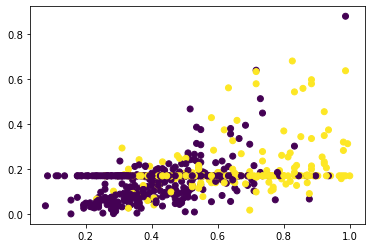

In [27]:
new_x = X_test[2][0]
new_y = X_test[2][1]
new_point=[(new_x,new_y)]
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(glucose + [new_x], insulin + [new_y], c=classes+[prediction[0]])
#plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

In [28]:
distance=[]
new_point=new_point[0]

def EuclideanDistance( new_point,train_point):
    point1 = np.array(new_point)
    point2 = np.array(train_point)
    sum_sq = np.sum(np.square(point1- point2))
    dist = np.sqrt(sum_sq)
    distance.append(dist)

for i in range(len(data)):
    EuclideanDistance(new_point,data[i])

for i in range(len(distance)):
    for j in range(i+1,len(distance)):
        if distance[j]<distance[i]:
            distance[i],distance[j]=distance[j],distance[i]
            data[i],data[j]=data[j],data[i]
            classes[i],classes[j]=classes[j],classes[i]
print(distance)
k_nearest=[]
k_nearest=distance[0:25]
k_data=data[0:25]
k_outcome=classes[0:25]
ones_count=k_outcome.count(1)
zeros_count= k_outcome.count(0)
print("ones_count = "+str(ones_count))
print("zeros_count = "+str(zeros_count))



[0.01290322580645159, 0.022170532917621392, 0.024038461538461536, 0.02955882103144587, 0.030861908797313913, 0.03148034686098889, 0.03442447725980403, 0.03533564594366052, 0.03663032191517412, 0.039375695713126976, 0.04053271560350405, 0.040923916675140455, 0.04255915513179694, 0.04255915513179697, 0.04377138381238758, 0.044133886784313965, 0.04434106583524273, 0.04434518811270006, 0.045559385648529356, 0.04556628972219045, 0.045566289722190595, 0.04850787401646719, 0.0493521156722628, 0.05048076923076922, 0.05161290322580642, 0.05288461538461539, 0.05342761616556033, 0.05342761616556033, 0.05342761616556033, 0.05342761616556033, 0.05342761616556033, 0.05342761616556033, 0.05342761616556033, 0.05346582222813043, 0.05346582222813043, 0.05346582222813043, 0.05381573634344802, 0.053815736343448044, 0.054963655312822136, 0.054963655312822136, 0.054963655312822136, 0.054963655312822136, 0.054963655312822136, 0.05496365531282215, 0.05496365531282215, 0.05496365531282215, 0.05682534602280982,

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [31]:
y_pred_knn=knn_model.predict(X_train)


[[355  76]
 [ 45 138]]


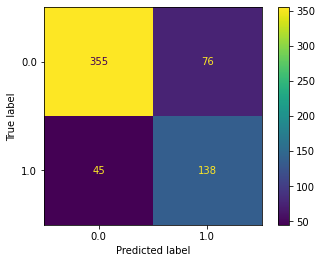

In [32]:
cnf_matrix=confusion_matrix(y_pred_knn,Y_train,labels=knn_model.classes_)
print(cnf_matrix)
display=ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=knn_model.classes_)
display.plot()
Y_train,Y_test = Y_test,Y_train
plt.show()

In [33]:
tn,tp,fp,fn=0,0,0,0
for i in range(len(Y_test)):
    i=int(i)
    if Y_test[i]==0 and y_pred_knn[i]==0:
        tn+=1
    elif Y_test[i]==1 and y_pred_knn[i]==1:
        tp+=1
    elif Y_test[i]==0 and y_pred_knn[i]==1:
        fp+=1
    else:
        fn+=1
print("TN = "+str(tn))
print("TP = ",str(tp))
print("FP = "+str(fp))
print("FN = "+str(fn))


TN = 355
TP =  138
FP = 45
FN = 76


In [34]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_score = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print("Precision = "+str(precision))
print("Recall = "+str(recall))
print("F_Score = "+str(f_score))
print("Accuracy = "+str(accuracy))

Precision = 0.7540983606557377
Recall = 0.6448598130841121
F_Score = 0.6952141057934509
Accuracy = 0.8029315960912052


In [35]:
knn_accuracy = accuracy_score(y_pred_knn, Y_test)
knn_accuracy

0.8029315960912052

In [36]:
print(classification_report(Y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       400
         1.0       0.75      0.64      0.70       214

    accuracy                           0.80       614
   macro avg       0.79      0.77      0.77       614
weighted avg       0.80      0.80      0.80       614



Support Vector Classifier Algorithm

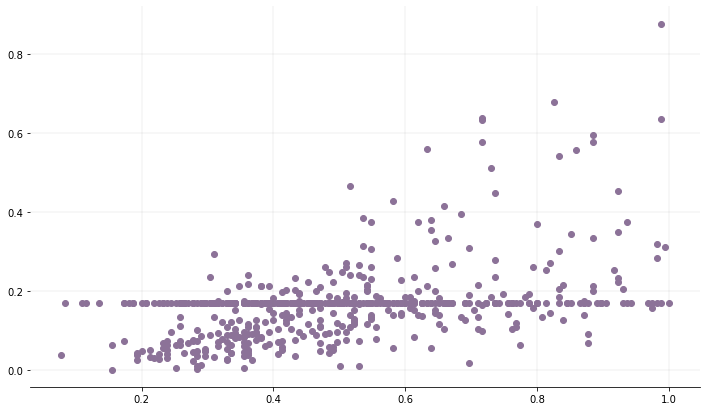

In [37]:

features = X[0:,0:]
label = Y[0]
fig, ax = plt.subplots(figsize=(12, 7))
Y_train,Y_test = Y_test,Y_train
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(X_train[0:,0], X_train[0:,1],color="#8C7298")
plt.show()

In [43]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

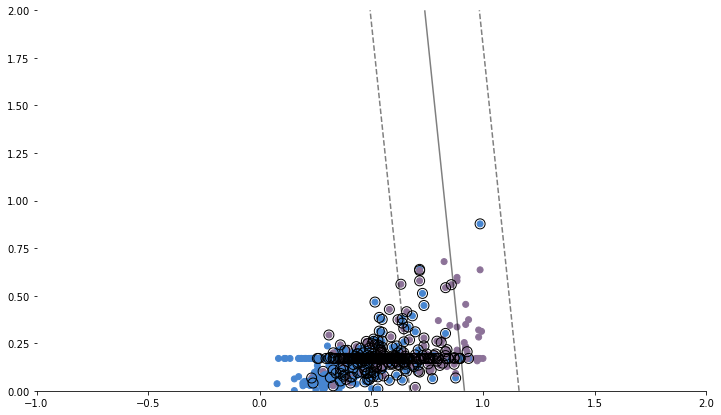

In [44]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
xx = np.linspace(-1, max(X[0:,0]) + 1, len(X_train[0:,0:2]))
yy = np.linspace(0, max(X[0:,1]) + 1, len(Y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]+[np.repeat(0, XX.ravel().size) for _ in range(2)]).T
train_size = len(X_train[0:,0:2])

colors = Y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
ax.scatter(X_train[0:,0], X_train[0:,1], c=colors)
Z = svc.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [45]:
y_pred_svc=svc.predict(X_test)
print(y_pred_svc)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]


In [47]:
tn,tp,fp,fn=0,0,0,0
for i in range(len(Y_test)):
    i=int(i)
    if Y_test[i]==0 and y_pred_svc[i]==0:
        tn+=1
    elif Y_test[i]==1 and y_pred_svc[i]==1:
        tp+=1
    elif Y_test[i]==0 and y_pred_svc[i]==1:
        fp+=1
    else:
        fn+=1
print("TN = "+str(tn))
print("TP = ",str(tp))
print("FP = "+str(fp))
print("FN = "+str(fn))

TN = 85
TP =  28
FP = 15
FN = 26


[[85 26]
 [15 28]]


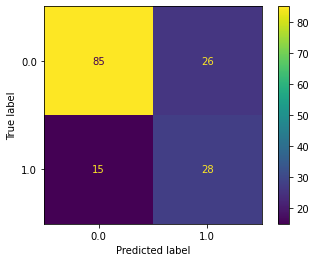

In [48]:
cnf_matrix=confusion_matrix(y_pred_svc,Y_test,labels=svc.classes_)
print(cnf_matrix)
display=ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=logreg.classes_)
display.plot()
plt.show()

In [49]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_score = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print("Precision = "+str(precision))
print("Recall = "+str(recall))
print("F_Score = "+str(f_score))
print("Accuracy = "+str(accuracy))

Precision = 0.6511627906976745
Recall = 0.5185185185185185
F_Score = 0.577319587628866
Accuracy = 0.7337662337662337


In [50]:
svc_accuracy = accuracy_score(y_pred_svc, Y_test)
svc_accuracy

0.7337662337662337

In [51]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       100
         1.0       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



Naive Bayes Algorithm

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [53]:
y_pred_nb=nb.predict(X_test)
print(y_pred_nb)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]


In [54]:
Y_test

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0.])

In [55]:
tn,tp,fp,fn=0,0,0,0
for i in range(len(Y_test)):
    i=int(i)
    if Y_test[i]==0 and y_pred_nb[i]==0:
        tn+=1
    elif Y_test[i]==1 and y_pred_nb[i]==1:
        tp+=1
    elif Y_test[i]==0 and y_pred_nb[i]==1:
        fp+=1
    else:
        fn+=1
print("TN = "+str(tn))
print("TP = ",str(tp))
print("FP = "+str(fp))
print("FN = "+str(fn))

TN = 81
TP =  29
FP = 19
FN = 25


[[81 25]
 [19 29]]


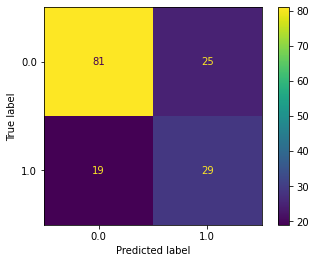

In [56]:
cnf_matrix=confusion_matrix(y_pred_nb,Y_test,labels=nb.classes_)
print(cnf_matrix)
display=ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=logreg.classes_)
display.plot()
plt.show()

In [58]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_score = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print("Precision = "+str(precision))
print("Recall = "+str(recall))
print("F_Score = "+str(f_score))
print("Accuracy = "+str(accuracy))

Precision = 0.6041666666666666
Recall = 0.5370370370370371
F_Score = 0.5686274509803922
Accuracy = 0.7142857142857143


In [59]:
nb_accuracy = accuracy_score(y_pred_nb, Y_test)
nb_accuracy

0.7142857142857143

In [60]:
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79       100
         1.0       0.60      0.54      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154



Decision Tree Algorithm

In [83]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state = 42)
decision_tree.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

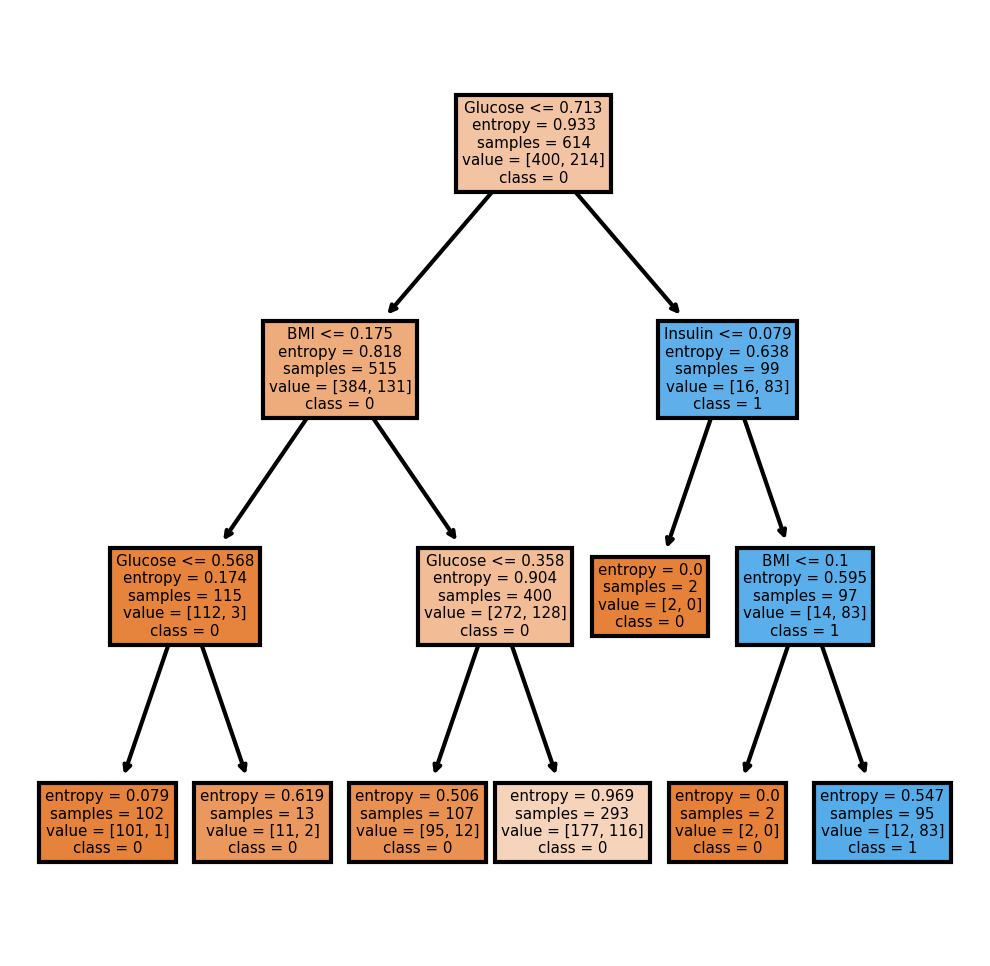

In [84]:
fn=['Glucose','Insulin','BMI','Age']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [70]:
tree.export_graphviz(decision_tree,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [69]:
y_pred_dt=decision_tree.predict(X_test)
print(y_pred_dt)

[1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]


In [70]:
tn,tp,fp,fn=0,0,0,0
for i in range(len(Y_test)):
    i=int(i)
    if Y_test[i]==0 and y_pred_dt[i]==0:
        tn+=1
    elif Y_test[i]==1 and y_pred_dt[i]==1:
        tp+=1
    elif Y_test[i]==0 and y_pred_dt[i]==1:
        fp+=1
    else:
        fn+=1
print("TN = "+str(tn))
print("TP = ",str(tp))
print("FP = "+str(fp))
print("FN = "+str(fn))

TN = 81
TP =  41
FP = 19
FN = 13


[[81 13]
 [19 41]]


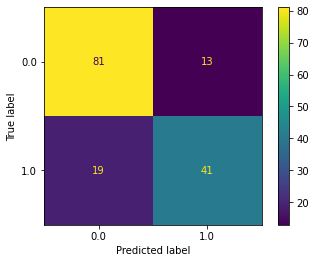

In [71]:
cnf_matrix=confusion_matrix(y_pred_dt,Y_test,labels=decision_tree.classes_)
print(cnf_matrix)
display=ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=logreg.classes_)
display.plot()
plt.show()

In [72]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_score = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print("Precision = "+str(precision))
print("Recall = "+str(recall))
print("F_Score = "+str(f_score))
print("Accuracy = "+str(accuracy))

Precision = 0.6833333333333333
Recall = 0.7592592592592593
F_Score = 0.7192982456140351
Accuracy = 0.7922077922077922


In [73]:
decision_tree_accuracy = accuracy_score(y_pred_dt, Y_test)
decision_tree_accuracy

0.7922077922077922

In [74]:
print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84       100
         1.0       0.68      0.76      0.72        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.80      0.79      0.79       154



Random Forest Algorithm

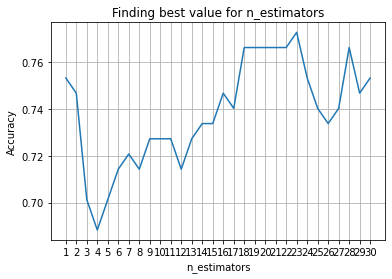

Highest value:  0.7727272727272727


In [75]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
   
    random_forest = RandomForestClassifier(n_estimators = i, criterion = 'entropy',max_depth=6, random_state = 42)

    random_forest .fit(X_train, Y_train)
    prediction =  random_forest.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [76]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 23, criterion = 'entropy',max_depth=6, random_state = 42)
random_forest.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=23,
                       random_state=42)

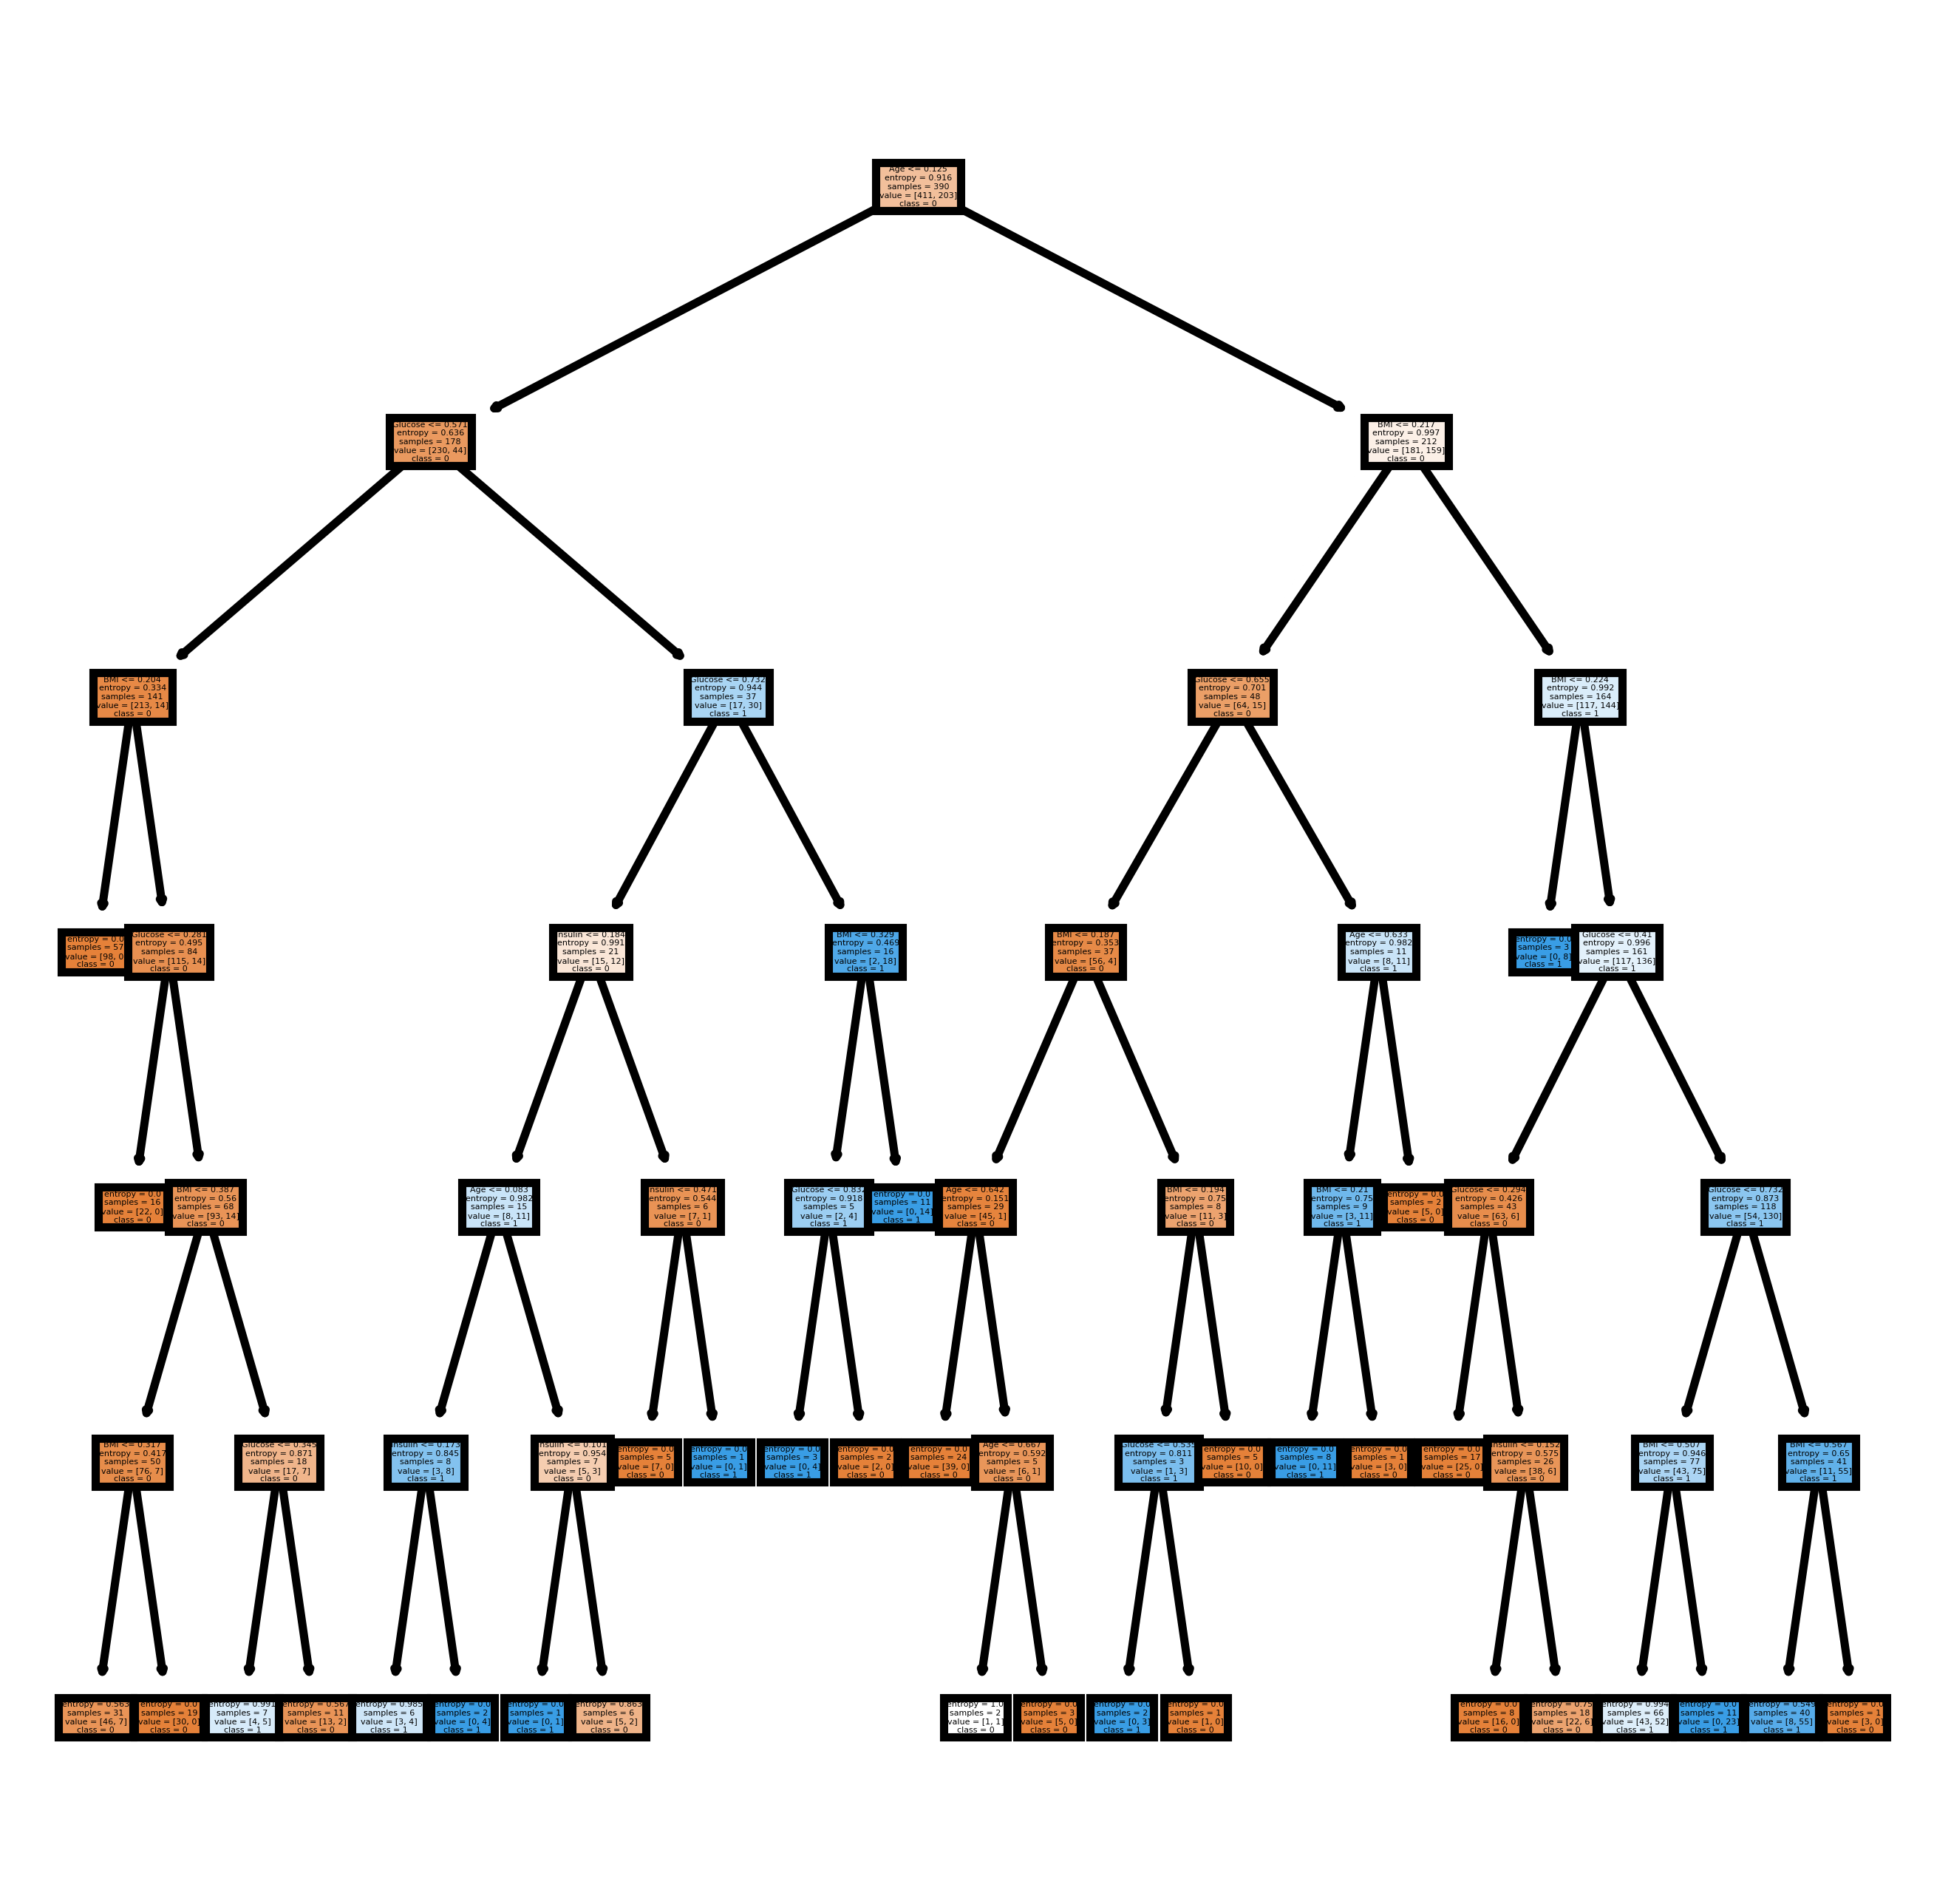

In [77]:
fn=['Glucose','Insulin','BMI','Age']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(random_forest.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [78]:
y_pred_rf=random_forest.predict(X_test)
print(y_pred_rf)

[1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]


In [79]:
tn,tp,fp,fn=0,0,0,0
for i in range(len(Y_test)):
    i=int(i)
    if Y_test[i]==0 and y_pred_rf[i]==0:
        tn+=1
    elif Y_test[i]==1 and y_pred_rf[i]==1:
        tp+=1
    elif Y_test[i]==0 and y_pred_rf[i]==1:
        fp+=1
    else:
        fn+=1
print("TN = "+str(tn))
print("TP = ",str(tp))
print("FP = "+str(fp))
print("FN = "+str(fn))

TN = 85
TP =  34
FP = 15
FN = 20


In [80]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_score = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print("Precision = "+str(precision))
print("Recall = "+str(recall))
print("F_Score = "+str(f_score))
print("Accuracy = "+str(accuracy))

Precision = 0.6938775510204082
Recall = 0.6296296296296297
F_Score = 0.6601941747572815
Accuracy = 0.7727272727272727


In [84]:
random_forest_accuracy = accuracy_score(y_pred_rf, Y_test)
random_forest_accuracy

0.7727272727272727

[[85 20]
 [15 34]]


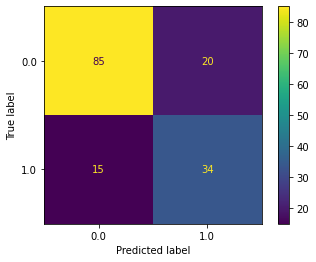

In [81]:
cnf_matrix=confusion_matrix(y_pred_rf,Y_test,labels=decision_tree.classes_)
print(cnf_matrix)
display=ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=logreg.classes_)
display.plot()
plt.show()

In [86]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       100
         1.0       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [82]:
print("Logistic Regression: " + str(logreg_accuracy * 100))
print("K Nearest neighbors: " + str(knn_accuracy * 100))
print("Support Vector Classifier: " + str(svc_accuracy * 100))
print("Naive Bayes: " + str(nb_accuracy * 100))
print("Decision tree: " + str(decision_tree_accuracy * 100))
print("Random Forest: " + str(random_forest_accuracy * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 80.29315960912052
Support Vector Classifier: 73.37662337662337
Naive Bayes: 71.42857142857143
Decision tree: 79.22077922077922


NameError: name 'random_forest_accuracy' is not defined